In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt, exp, pi
from sklearn.naive_bayes import GaussianNB
from scipy.stats import weibull_min, weibull_max, genextreme
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
all_frames_enriched = [1, 2, 4, 5, 6, 36, 38, 40, 42, 45, 47, 50, 52, 55, 57, 60, 62, 65, 67, 70,
                      72, 74, 76, 78, 80, 84, 86, 87, 100, 142]

all_frames_uniform = [1, 2, 4, 5, 6, 36, 38, 40, 42, 45, 47, 50, 52, 55, 57, 60, 62, 65, 67, 70,
                      72, 74, 76, 78, 80, 86, 101, 111, 121, 132]

all_frames_long = [1, 2, 4, 5, 6, 36, 38, 40, 42, 45, 47, 50, 52, 55, 57, 60, 62, 65, 67, 70,
                   72, 74, 76, 78, 80, 140, 141, 142]

human_test_ind = [36, 38, 40, 42, 45, 47, 50, 52, 55, 57, 60, 62, 65, 67, 70, 72, 74, 76, 78, 80,]

human_uniform_prob = [0.074786, 0.057692, 0.066239, 0.104701, 0.123932,
                      0.188034, 0.258547, 0.388889, 0.485043, 0.602564,
                      0.690171, 0.782051, 0.856838, 0.884615, 0.899573,
                      0.931624, 0.938034, 0.955128, 0.950855, 0.972222]
human_enrich_prob = [0.119048, 0.062907, 0.075922, 0.097614, 0.132321,
                     0.201735, 0.288503, 0.392625, 0.496746, 0.613883,
                     0.722343, 0.800434, 0.872017, 0.924078, 0.952278,
                     0.952278, 0.958696, 0.976087, 0.973913, 0.980435]

human_long_prob = [0.06572769953051644, 0.018823529411764704, 0.009411764705882352,
                   0.011764705882352941, 0.02358490566037736, 0.030660377358490566,
                   0.04245283018867924, 0.0589622641509434, 0.09669811320754718,
                   0.12028301886792453, 0.18632075471698112, 0.2169811320754717,
                   0.2783018867924528, 0.33490566037735847, 0.42924528301886794,
                   0.5047169811320755, 0.5825471698113207, 0.6279620853080569,
                   0.7156398104265402, 0.7535545023696683]

In [3]:
gauss_uniform = {1: 8.717990047646068e-07, 2: 1.310764017259706e-07, 4: 7.459207920710758e-07, 5: 1.1575879283643508e-06, 6: 1.432046569774354e-06, 36: 0.9861240238801137, 38: 0.9882920004641657, 40: 0.9910606247692215, 42: 0.9929742464855039, 45: 0.9943763365337283, 47: 0.9953131156605974, 50: 0.9959826700387864, 52: 0.9964848362692685, 55: 0.9968754100170217, 57: 0.9971878690153178, 60: 0.9974435172866525, 62: 0.9976565575127648, 65: 0.9978368223194752, 67: 0.9979913350109413, 70: 0.9981252460102119, 72: 0.9982424181345736, 74: 0.9983458053031281, 76: 0.9984377050085099, 78: 0.9985199310606936, 80: 0.9985939345076589, 84: 1.0, 86: 1.0, 87: 1.0, 100: 1.0, 142: 1.0}
gauss_enrich = {1: 3.278627302112556e-10, 2: 5.555344167710612e-10, 4: 1.5803093727157522e-09, 5: 1.6240702491084542e-09, 6: 5.524172604598628e-09, 36: 0.9719535690868238, 38: 0.9785202768474309, 40: 0.9817537745210407, 42: 0.9838018917532273, 45: 0.986858975332305, 47: 0.9890182341240367, 50: 0.9905870272523226, 52: 0.991763648019429, 55: 0.9926787982336835, 57: 0.9934109184102092, 60: 0.994009925827463, 62: 0.9945090986751743, 65: 0.9949314757001609, 67: 0.9952935131501495, 70: 0.9956072789401395, 72: 0.9958818240063808, 74: 0.9961240696530642, 76: 0.9963393991167829, 78: 0.9965320623211628, 80: 0.9967054592051046, 86: 1.0, 101: 1.0, 111: 1.0, 121: 1.0, 132: 1.0}
gauss_long = {1: 7.089212526637679e-10, 2: 4.9787674649643025e-09, 4: 1.3164784309824592e-09, 5: 1.7339398378626445e-09, 6: 5.9248992313656675e-09, 36: 0.9712394347696113, 38: 0.9779675993378921, 40: 0.9813284889686997, 42: 0.9834521857804241, 45: 0.9865555642466192, 47: 0.9887610465072322, 50: 0.9903665763337912, 52: 0.991570753347636, 55: 0.9925073363023813, 57: 0.9932566026720224, 60: 0.9938696387927476, 62: 0.9943805022266853, 65: 0.9948127712861711, 67: 0.9951832876228731, 70: 0.9955044017813482, 72: 0.995785376670014, 74: 0.9960332956894249, 76: 0.9962536681511236, 78: 0.9964508435115907, 80: 0.9966283013360112, 86: 1.0, 101: 1.0, 111: 1.0, 121: 1.0, 132: 1.0}

In [4]:
evt_uniform = {1: 0.0, 2: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 36: 0.6430856719886722, 38: 0.6595876860614681, 40: 0.6734570682740554, 42: 0.692235346615056, 45: 0.7127703236914147, 47: 0.7290532429632599, 50: 0.7482477992241895, 52: 0.7654638042263986, 55: 0.7822253819369808, 57: 0.7984518708797951, 60: 0.8137739693103715, 62: 0.8266128046864722, 65: 0.8378495675159161, 67: 0.8476582720973199, 70: 0.8572898466926806, 72: 0.8661707621829521, 74: 0.8740111236469472, 76: 0.8809836862662538, 78: 0.8872249694371815, 80: 0.8928442839586593, 86: 0.8823098369126268, 101: 0.976778652466525, 111: 0.9845825479490846, 121: 0.9854191538743294}
evt_enrich = {1: 0.0, 2: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 36: 0.7465728850393321, 38: 0.7708195892654125, 40: 0.792258566602447, 42: 0.8132117171484701, 45: 0.8349371436020671, 47: 0.8532068267380599, 50: 0.868859121804597, 52: 0.8814214109653854, 55: 0.89185640952707, 57: 0.9004237715565024, 60: 0.9084297656980435, 62: 0.9154861051375834, 65: 0.9218558984785429, 67: 0.9273333417896384, 70: 0.9320935398593151, 72: 0.9362685979445363, 74: 0.9399601256475735, 76: 0.9432475058296185, 78: 0.9461936496945736, 80: 0.948849058037351, 84: 0.862951611776175, 86: 0.8774533522047456, 87: 0.8712462189001001, 100: 0.8901933502506898}
evt_long = {1: 0.0, 2: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 36: 0.007454135482974935, 38: 0.011729955762376513, 40: 0.015090516644565578, 42: 0.01863782958167989, 45: 0.02347274360198284, 47: 0.031095135740819017, 50: 0.04783764891099067, 52: 0.06357097943043129, 55: 0.08071131550626649, 57: 0.10001949308346128, 60: 0.12410476971998474, 62: 0.1471940837099392, 65: 0.17365167747797625, 67: 0.20211928945224206, 70: 0.22985913918652118, 72: 0.2580902975253851, 74: 0.2846302193620046, 76: 0.3108144175869636, 78: 0.336006448356687, 80: 0.3592940447593477, 140: 0.4500998750203727, 141: 0.4647103071445625, 142: 0.495546166341003}

In [5]:
len(evt_uniform)

29

# Plot 4 panel figure

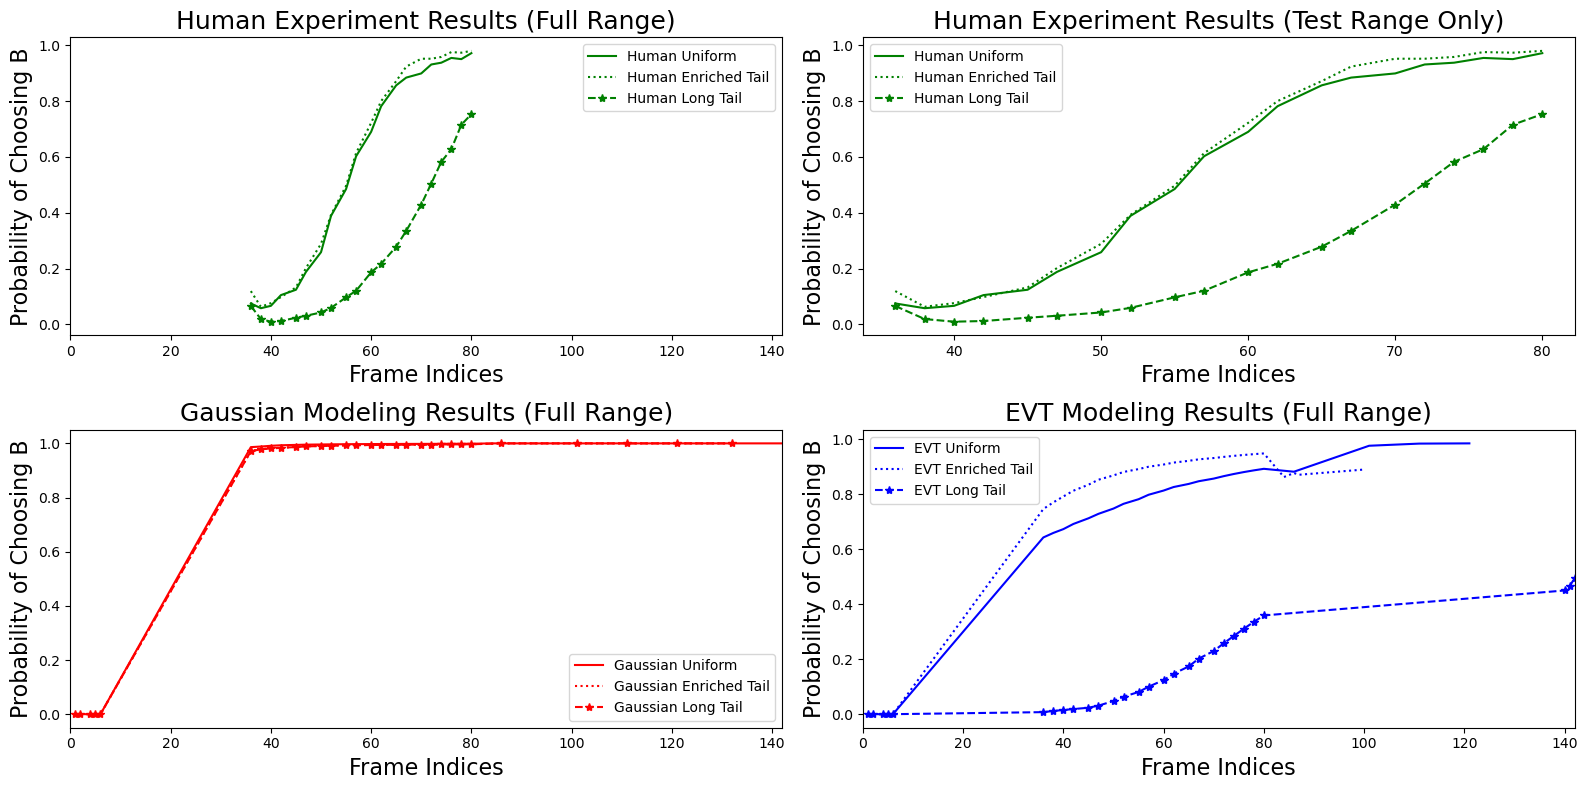

In [8]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axes = axes.flatten()

title_fontsize = 18
label_fontsize = 16
text_fontsize = 16

# Gauss
list_gauss_uniform = sorted(gauss_uniform.items())
x_gauss_uniform, y_gauss_uniform = zip(*list_gauss_uniform)

list_gauss_enrich = sorted(gauss_enrich.items())
x_gauss_enrich, y_gauss_enrich = zip(*list_gauss_enrich)

list_gauss_long = sorted(gauss_long.items())
x_gauss_long, y_gauss_long = zip(*list_gauss_long)

# EVT
list_evt_uniform = sorted(evt_uniform.items())
x_evt_uniform, y_evt_uniform = zip(*list_evt_uniform)

list_evt_enrich = sorted(evt_enrich.items())
x_evt_enrich, y_evt_enrich = zip(*list_evt_enrich)

list_evt_long = sorted(evt_long.items())
x_evt_long, y_evt_long = zip(*list_evt_long)

# Sample data
# axes[0].text(5, 0.5, "To resemble the NSF figure, this is a placeholder for stumuli", fontsize=12, color="green", ha="center")

# axes[0].set_title("To resemble the NSF figure,\n this is a placeholder for stumuli", fontsize=title_fontsize)
# axes[0].plot(x_gauss_uniform[5:25], y_gauss_uniform[5:25], label="Gaussain Uniform", color='red',)
# axes[0].plot(x_gauss_enrich[5:25], y_gauss_enrich[5:25], label="Gaussain Enriched Tail", color='red', linestyle=':',)
# axes[0].plot(x_gauss_long[5:25], y_gauss_long[5:25], label="Gaussain Long Tail", color='red', linestyle='--',)

# axes[0].plot(x_evt_uniform[5:25], y_evt_uniform[5:25], label="EVT Uniform", color='blue')
# axes[0].plot(x_evt_enrich[5:25], y_evt_enrich[5:25], label="EVT Enriched Tail", color='blue', linestyle=':',)
# axes[0].plot(x_evt_long[5:25], y_evt_long[5:25], label="EVT Enriched Tail", color='blue', linestyle='--',)

# axes[0].plot(human_test_ind, human_uniform_prob , label="Human Uniform", color='green')
# axes[0].plot(human_test_ind, human_enrich_prob , label="Human Enriched Tail", color='green', linestyle=':',)
# axes[0].plot(human_test_ind, human_enrich_prob , label="Human Enriched Tail", color='green', linestyle=':',)


axes[0].set_title("Place Holder", fontsize=title_fontsize)
# axes[0].set_xlabel("Frame Indices", fontsize=label_fontsize)
# axes[0].set_ylabel("Probability of Choosing B", fontsize=label_fontsize)
# axes[0].legend()


# Plot on each subplot
# Human
axes[0].plot(human_test_ind, human_uniform_prob, label="Human Uniform", color="green")
axes[0].plot(human_test_ind, human_enrich_prob, label="Human Enriched Tail",linestyle=':', color="green")
axes[0].plot(human_test_ind, human_long_prob, label="Human Long Tail",linestyle='--', color="green", marker='*')
axes[0].set_title("Human Experiment Results (Full Range)", fontsize=title_fontsize)
axes[0].set_xlabel("Frame Indices", fontsize=label_fontsize)
axes[0].set_ylabel("Probability of Choosing B", fontsize=label_fontsize)
axes[0].set_xlim(0, 142) 
axes[0].legend()


axes[1].plot(human_test_ind, human_uniform_prob, label="Human Uniform", color="green")
axes[1].plot(human_test_ind, human_enrich_prob, label="Human Enriched Tail",linestyle=':', color="green")
axes[1].plot(human_test_ind, human_long_prob, label="Human Long Tail",linestyle='--', color="green", marker='*')
axes[1].set_title("Human Experiment Results (Test Range Only)", fontsize=title_fontsize)
axes[1].set_xlabel("Frame Indices", fontsize=label_fontsize)
axes[1].set_ylabel("Probability of Choosing B", fontsize=label_fontsize)
axes[1].legend()


axes[2].plot(x_gauss_uniform, y_gauss_uniform, label="Gaussian Uniform", color="red")
axes[2].plot(x_gauss_enrich, y_gauss_enrich, label="Gaussian Enriched Tail", linestyle=':', color="red")
axes[2].plot(x_gauss_long, y_gauss_long, label="Gaussian Long Tail", linestyle='--', color="red", marker='*')
axes[2].set_title("Gaussian Modeling Results (Full Range)", fontsize=title_fontsize)
axes[2].set_xlabel("Frame Indices", fontsize=label_fontsize)
axes[2].set_ylabel("Probability of Choosing B", fontsize=label_fontsize)
axes[2].set_xlim(0, 142) 
axes[2].legend()


axes[3].plot(x_evt_uniform, y_evt_uniform, label="EVT Uniform", color="blue")
axes[3].plot(x_evt_enrich, y_evt_enrich, label="EVT Enriched Tail", linestyle=':', color="blue")
axes[3].plot(x_evt_long, y_evt_long, label="EVT Long Tail", linestyle="--", color="blue", marker='*')
axes[3].set_title("EVT Modeling Results (Full Range)", fontsize=title_fontsize)
axes[3].set_xlabel("Frame Indices", fontsize=label_fontsize)
axes[3].set_ylabel("Probability of Choosing B", fontsize=label_fontsize)
axes[3].set_xlim(0, 142) 
axes[3].legend()

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()